In [12]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
#Hyper Parameters
OUTPUT_CLASSES = 22
FILE_NAME = "../Data/processed_data.csv"
BATCH_SIZE = 32
EPOCH_LENGTH = 100
VALIDATION_PERCENTAGE = 0.2
TEST_SIZE_PERCENTAGE = 0.2
X_VECTOR_NAMES = ["syllables","periods","hyphens","commas","exclamations","questions","quotes"
,"dollars","percentages","ands","asterisks","pluses","equals","slashes","hashes","replies","retweets",
"links","smiles","bigsmiles","winks","bigwinks","unsures","semicolons","hashtags"]

In [14]:
def transformTargetLabel(label,lableType):
    if(lableType == "onehot"):
        y_lb = LabelBinarizer()
        y_lb.fit(label)
        tranformed_labels = y_lb.transform(label)
    elif(lableType == "labelencode"):
        y_lb = LabelEncoder()
        tranformed_labels = y_lb.fit_transform(label)
    else:
         tranformed_labels = label
    return tranformed_labels

In [15]:
# Define model architecture in keras
def define_model(input_len, output_size, verbose = True,
                drop_out_pct = 0.25, activation_fn = 'relu', learning = 0.0001,
                 loss_fn ='categorical_crossentropy', output_activation_fn="softmax", metrics_list=['accuracy']):

    inputs1 = Input(shape = (input_len,))
    hidden1 = Dense(400, activation=activation_fn)(inputs1)
    hidden2 = Dense(600, activation=activation_fn)(hidden1)
    hidden3 = Dense(1200, activation=activation_fn)(hidden2)
    hidden4 = Dense(1200, activation=activation_fn)(hidden3)
    hidden5 = Dense(3700, activation=activation_fn)(hidden4)
    hidden6 = Dense(1200, activation=activation_fn)(hidden5)
    hidden7 = Dense(1200, activation=activation_fn)(hidden6)
    hidden8 = Dense(500, activation=activation_fn)(hidden7)
    flat1 = Flatten()(hidden7)
    

    # Create output layer
    output = Dense(output_size, activation = output_activation_fn)(flat1)
    
    # Create model
    model = Model(inputs = [inputs1], outputs = output)
    
    # Compile model
    model.compile(loss=loss_fn, optimizer = Adam(lr = learning), metrics=metrics_list)
    
    if verbose:
        print(model.summary())
        
    return model

In [16]:
data = pd.read_csv(FILE_NAME)
data.head()

,Unnamed: 0,raw_text,username,syllables,periods,hyphens,commas,exclamations,questions,quotes,...,replies,retweets,links,smiles,bigsmiles,winks,bigwinks,unsures,semicolons,hashtags
0,4,"""Appreciate a pair of nice titties",0laotan,11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,"""son",0laotan,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10,me nutting in her means no one else can get h...,0laotan,21,2,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,12,Her being a good person means she's entitled ...,0laotan,24,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,13,this. https://t.co/WiUKzhqXp1,0laotan,3,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
#Get X vector and y label
X = data[X_VECTOR_NAMES]
y = data['username']

In [18]:
#Transform y label into numeric representation
y = transformTargetLabel(y,"onehot")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_PERCENTAGE, random_state = 5)

In [20]:
# Check shapes of created datasets
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(22298, 25)
(5575, 25)
(22298, 22)
(5575, 22)


In [21]:
ann_model = define_model(X.shape[1], OUTPUT_CLASSES)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 400)               10400     
                                                                 
 dense_1 (Dense)             (None, 600)               240600    
                                                                 
 dense_2 (Dense)             (None, 1200)              721200    
                                                                 
 dense_3 (Dense)             (None, 1200)              1441200   
                                                                 
 dense_4 (Dense)             (None, 3700)              4443700   
                                                                 
 dense_5 (Dense)             (None, 1200)              444120

C:\Users\leobl\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
ann_model.fit(X_train, y, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
                verbose = 1, validation_split = VALIDATION_PERCENTAGE)

Epoch 1/100
558/558 [==============================] - 29s 51ms/step - loss: 2.4661 - accuracy: 0.1588 - val_loss: 7.7716 - val_accuracy: 0.0000e+00
Epoch 2/100
558/558 [==============================] - 29s 52ms/step - loss: 2.4162 - accuracy: 0.1607 - val_loss: 8.1633 - val_accuracy: 0.0000e+00
Epoch 3/100
558/558 [==============================] - 30s 54ms/step - loss: 2.4109 - accuracy: 0.1649 - val_loss: 8.1559 - val_accuracy: 0.0000e+00
Epoch 4/100
558/558 [==============================] - 29s 53ms/step - loss: 2.4088 - accuracy: 0.1621 - val_loss: 9.4475 - val_accuracy: 0.0000e+00
Epoch 5/100
558/558 [==============================] - 28s 51ms/step - loss: 2.4065 - accuracy: 0.1627 - val_loss: 9.4361 - val_accuracy: 0.0000e+00
Epoch 6/100
558/558 [==============================] - 28s 50ms/step - loss: 2.4063 - accuracy: 0.1648 - val_loss: 8.7003 - val_accuracy: 0.0000e+00
Epoch 7/100
558/558 [==============================] - 28s 50ms/step - loss: 2.4052 - accuracy: 0.1659 - v

In [ ]:
acc = ann_model.history.history['accuracy']
val_acc = ann_model.history.history['val_accuracy']
loss = ann_model.history.history['loss']
val_loss = ann_model.history.history['val_loss']
epochs_range = range(EPOCH_LENGTH)

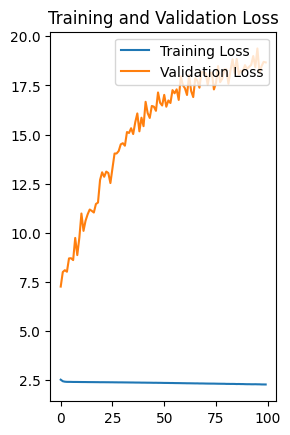

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

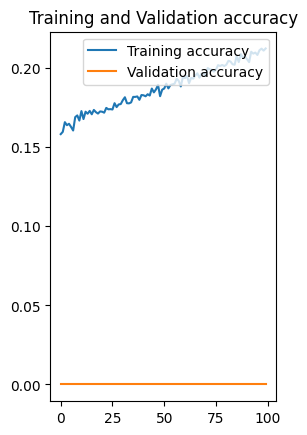

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation accuracy')
plt.show()